In [2]:
import sys
import cmath
sys.path.append('/home/jjlong/local_gateway/')
from algorithms import np
import json
import seaborn as sns
import matplotlib
%matplotlib inline
import time
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        ex_time = te-ts
        print('method: ',method,ex_time)
        return result
    return timed
with open('192.168.123.17.json') as f:
    d = json.load(f)

In [3]:
def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    T= [cmath.exp(-2j*cmath.pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]
@timeit
def zero_mean(x):
    a = np.Vector(*x)
    return a._zero_mean()
    

method:  <function zero_mean at 0x7fcc22f19c80> 0.0015714168548583984


/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


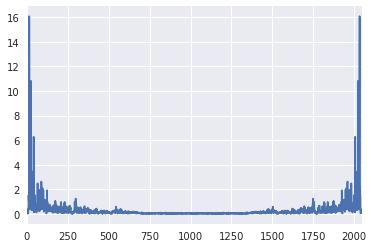

In [11]:
a = [abs(i) for i in fft(zero_mean(d['x']))]
sns.tsplot(a)

In [14]:
max(a)

16.069906049565493